This project will be a brief and exploratory analysis of Bayesian Linear Regression.

By: Ryan


Let:

    Errors be N~(0,30) and the true slope B1= 3 and true intercept B0=23. We will assume that we know the value of the variance of the error term defined as sigma^2 which in this case is 30. However, we will wish to solve for B1 and B0, and assume that these parameters we do not know. Below, the true line that our data is generated from will be represented and shown as the red line on the graph, however even though it is seen here it is invisible to the regression model, so it is really just being shown for a reference to the accuracy of our prediction.
    
    Knowns:
       sigma^2 = 30 variance of our error term
       
    Unknowns:
       B0 intercept term and B1 slope term
       
Step 1:
    
    Plot a random assortment of data generated from some true line, and then try to predict the line using Ordinary Least Squares.
    

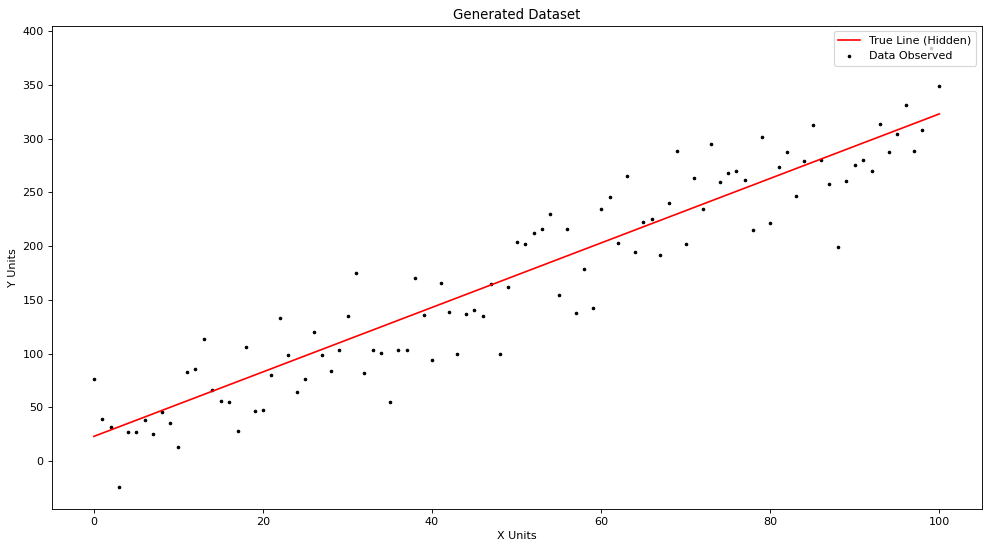

In [222]:
import numpy as np
import matplotlib.pyplot as plt
import random as random
import math
from scipy.stats import norm

random.seed(3)
np.random.seed(3)

slope = 3
intercept = 23

x = np.linspace(0,100,101)
y =[(intercept + slope*i + np.random.normal(0,30)) for i in x]
y = np.array(y)
y_true = intercept + slope*x

plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x,y, s=5, color = 'black', label = 'Data Observed')
plt.plot(x,y_true, color= 'red', label = 'True Line (Hidden)')
plt.title("Generated Dataset")
plt.ylabel("Y Units")
plt.xlabel("X Units")
plt.legend(loc = 'upper right')
plt.show()

Step 2: Fit an Ordinary Least Squares Line to the Model and determine how it looks

    The Ordinary Least Squares line provides a very good fit to the model, however the one thing that it does not give us is a confidence interval of our prediction. Without this, we have no real idea as to how sure we are about the line we have created and its accuracy, which is where the Bayesian Approach has an advantage.

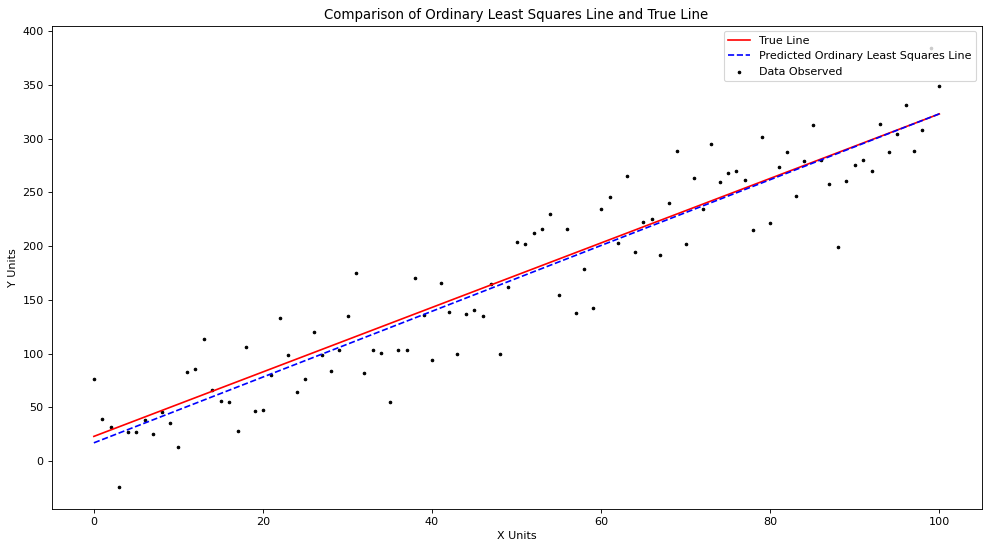

In [223]:
x=x
y=y

n = len(x)
z = np.zeros(n) + 1

X = np.column_stack((z,x))
OrdLS_Vector = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

B0 = OrdLS_Vector[0]
B1 = OrdLS_Vector[1]

y_pred_OrdLS = B0 + B1*x

plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x,y, s=5, color = 'black', label = 'Data Observed')
plt.plot(x,y_true, color= 'red', label = 'True Line')
plt.plot(x, y_pred_OrdLS,'--', color='blue', label='Predicted Ordinary Least Squares Line')
plt.title("Comparison of Ordinary Least Squares Line and True Line")
plt.ylabel("Y Units")
plt.xlabel("X Units")
plt.legend(loc = 'upper right')
plt.show()

Step 3: Construct Bayesian Linear Regression on the same dataset.

    We know that e~N(0,30) and lets say w = (parameter vector for B0 and B1), then w~N(0,Sigma_Matrix) where 
    Sigma_Matrix = [[200  0]  and the error sigma^2 = 30, variance of B0 = 200, variance of B1=10, and the mean of
                   [0  10]]   both B0 and B1 is zero as defined by our prior.
                   
    By assuming a Normally Distributed Prior, our posterior will also take the form of a Normal Distribution, as 
    the product of multiple Normal PDFs is a Normal PDF. 
    
    Posterior Mean = (X^T*X + sigma^2*Sigma_Matrix^-1)^-1*(X^T*Y)
    Posterior Variance = sigma^2*(X^T*X + sigma^2*Sigma_Matrix^-1)^-1
    
    So the Posterior will simulated and sampled from N~(Posterior Mean, Posterior Variance)

In [227]:
B0_Prior_Variance = 200
B1_Prior_Variance = 10
B0_B1_Covariance = 0

def Posteriors(Number_Of_Points):
    random.seed(3)
    np.random.seed(3)
    
    Rand = random.sample(list(x), Number_Of_Points)
    Rand = [int(i) for i in Rand]

    x_test = [x[i] for i in Rand]
    y_test = [y[i] for i in Rand]

    n = len(x_test)
    z = np.zeros(n) + 1
    error_sigma_2 = 30
    Sigma = np.array([[B0_Prior_Variance,B0_B1_Covariance],[B0_B1_Covariance,B1_Prior_Variance]])

    X = np.column_stack((z,x_test))
    Bayes_Mean = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X) + error_sigma_2*(np.linalg.inv(Sigma))),X.T),y_test)
    Bayes_Variance = error_sigma_2*((np.linalg.inv(np.dot(X.T,X) + error_sigma_2*np.linalg.inv(Sigma))))

    Bayes_B0_Mean = Bayes_Mean[0]
    Bayes_B0_Variance = Bayes_Variance[0][0]
    Bayes_B1_Mean = Bayes_Mean[1]
    Bayes_B1_Variance = Bayes_Variance[1][1]

    x_axis = np.arange(Bayes_B0_Mean-3*math.sqrt(B0_Prior_Variance),
                       Bayes_B0_Mean+3*math.sqrt(B0_Prior_Variance), 0.001)
    plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(x_axis, norm.pdf(x_axis,Bayes_B0_Mean,math.sqrt(Bayes_B0_Variance)))
    plt.xlim(x_axis[0],x_axis[-1])
    plt.title('The PDF of the Posterior for B0')
    plt.xlabel('Various values B0 can take')
    plt.show()

    x_axis = np.arange(Bayes_B1_Mean-3*math.sqrt(B1_Prior_Variance), 
                       Bayes_B1_Mean+3*math.sqrt(B1_Prior_Variance), 0.001)
    plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(x_axis, norm.pdf(x_axis,Bayes_B1_Mean,math.sqrt(Bayes_B1_Variance)))
    plt.xlim(x_axis[0],x_axis[-1])
    plt.title('The PDF of the Posterior for B1')
    plt.xlabel('Various values B1 can take')
    plt.show()

In [251]:
def Bayesian_Linear_Regression_Zero(Number_Of_Points, iterations):
    random.seed(3)
    np.random.seed(3)
    
    Rand = random.sample(list(x), Number_Of_Points)
    Rand = [int(i) for i in Rand]

    x_test = [x[i] for i in Rand]
    y_test = [y[i] for i in Rand]

    n = len(x_test)
    z = np.zeros(n) + 1
    error_sigma_2 = 30
    Sigma = np.array([[B0_Prior_Variance,B0_B1_Covariance],[B0_B1_Covariance,B1_Prior_Variance]])

    X = np.column_stack((z,x_test))
    Bayes_Mean = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X) + error_sigma_2*(np.linalg.inv(Sigma))),X.T),y_test)
    Bayes_Variance = error_sigma_2*((np.linalg.inv(np.dot(X.T,X) + error_sigma_2*np.linalg.inv(Sigma))))

    Bayes_B0_Mean = Bayes_Mean[0]
    #Bayes_B0_Variance = Bayes_Variance[0][0]
    Bayes_B1_Mean = Bayes_Mean[1]
    #Bayes_B1_Variance = Bayes_Variance[1][1]
    

    Bayes_B0_Sampling,Bayes_B1_Sampling = np.random.multivariate_normal(Bayes_Mean,Bayes_Variance,(2,iterations))
    #Bayes_B1_Sampling = np.random.normal(Bayes_B1_Mean,Bayes_B1_Variance,iterations)
    #Bayes_B0_Sampling = np.random.normal(Bayes_B0_Mean,Bayes_B0_Variance,iterations)


    plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
    
    Mean_Bayes_Line = Bayes_B0_Mean + x*Bayes_B1_Mean

    for c, i in enumerate(Bayes_B0_Sampling):
        y_pred = Bayes_B0_Sampling[c][0] + x*Bayes_B1_Sampling[c][1]
        plt.plot(x,y_pred, color = 'wheat')

    plt.title(str("Bayes with " + str(Number_Of_Points) + " Points"))
    plt.scatter(x_test,y_test, s=10, color = 'black', label = 'Data Observed')
    plt.plot(x, Mean_Bayes_Line,'-', color='black', label='Average Simulated Bayes Line')
    plt.plot(x,y_true, color= 'red', label = 'True Line')
    plt.ylabel("Y Units")
    plt.xlabel("X Units")
    plt.legend()
    plt.show()
    
def Bayesian_Linear_Regression(Number_Of_Points, iterations):
    random.seed(3)
    np.random.seed(3)
    
    Rand = random.sample(list(x), Number_Of_Points)
    Rand = [int(i) for i in Rand]

    x_test = [x[i] for i in Rand]
    y_test = [y[i] for i in Rand]

    n = len(x_test)
    z = np.zeros(n) + 1
    error_sigma_2 = 30
    Sigma = np.array([[B0_Prior_Variance,B0_B1_Covariance],[B0_B1_Covariance,B1_Prior_Variance]])

    X = np.column_stack((z,x_test))
    Bayes_Mean = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X) + error_sigma_2*(np.linalg.inv(Sigma))),X.T),y_test)
    Bayes_Variance = error_sigma_2*((np.linalg.inv(np.dot(X.T,X) + error_sigma_2*np.linalg.inv(Sigma))))

    Bayes_B0_Mean = Bayes_Mean[0]
    Bayes_B1_Mean = Bayes_Mean[1]
    
    Bayes_B0_Sampling,Bayes_B1_Sampling = np.random.multivariate_normal(Bayes_Mean,Bayes_Variance,(2,iterations))
    
    OrdLS_Vector = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y_test)

    B0 = OrdLS_Vector[0]
    B1 = OrdLS_Vector[1]
    
    plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
    
    Mean_Bayes_Line = Bayes_B0_Mean + x*Bayes_B1_Mean
    y_pred_OrdLS = B0 + B1*x

    for c, i in enumerate(Bayes_B0_Sampling):
        y_pred = Bayes_B0_Sampling[c][0] + x*Bayes_B1_Sampling[c][1]
        plt.plot(x,y_pred, color = 'wheat')

    plt.title(str("Bayes with " + str(Number_Of_Points) + " Points"))
    plt.scatter(x_test,y_test, s=10, color = 'black', label = 'Data Observed')
    plt.plot(x, y_pred_OrdLS,'--', color='blue', label='Predicted Ordinary Least Squares Line')
    plt.plot(x, Mean_Bayes_Line,'-', color='black', label='Average Simulated Bayes Line')
    plt.plot(x,y_true, color= 'red', label = 'True Line')
    plt.ylabel("Y Units")
    plt.xlabel("X Units")
    plt.legend()
    plt.show()

What do the Prior Distributions look like before the process?

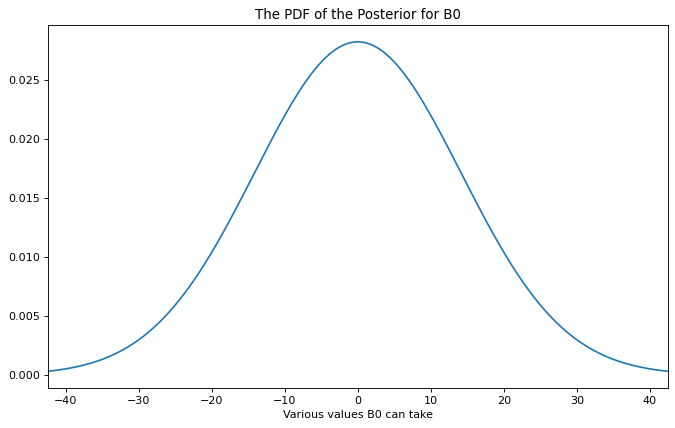

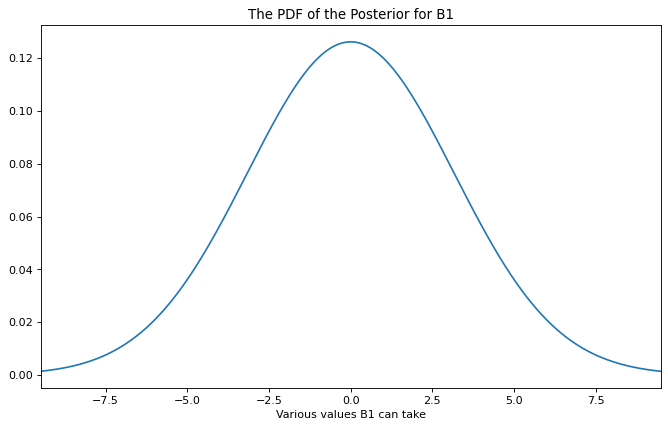

In [252]:
Posteriors(0) #Even though this function is called posteriors, it is showing the priors, since we have zero data 
#points thus far, so there is no posterior to be made yet, it will just be the same as the priors.

What Would the Data look like with ZERO Data points, and just the use of our two prior distributions?

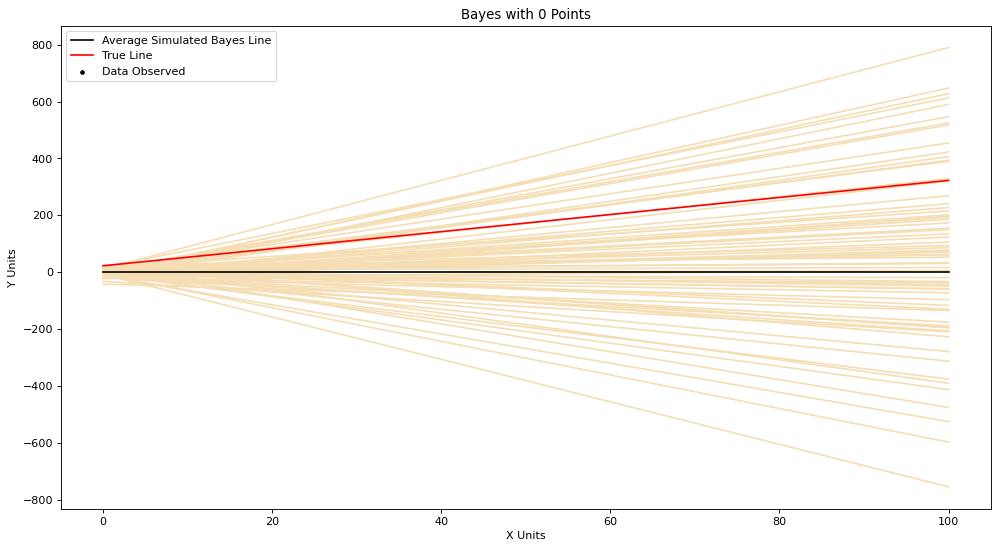

In [253]:
Bayesian_Linear_Regression_Zero(0,70)

Analysis:
    
    This is an important graph to observe for a couple of reasons. The first, is that it allows us to visually interpret what our prior distributions are actually doing. We can see that the intercept B0~N(0,200) and when we look at the intercept location on the graph, we can see that we simulate a host of lines ranging around this variance threshold. We can also see that our slope B1~N(0,10) creates a bunch of simulated lines that have positive and negative slopes, of which we clearly pulled from a normal distribution of mean zero variance 10. By combining these two weights, we can pair up a B0 that is pulled from N~(0,200) and combine it with a B1 pulled from N~(0,10) and then simulate a line. We do this multiple times to create the plot above, where we see the black line is the average of our simulations, flat at 0, since this comes from the means that are both zero from our two normal distributions for B0 and B1.

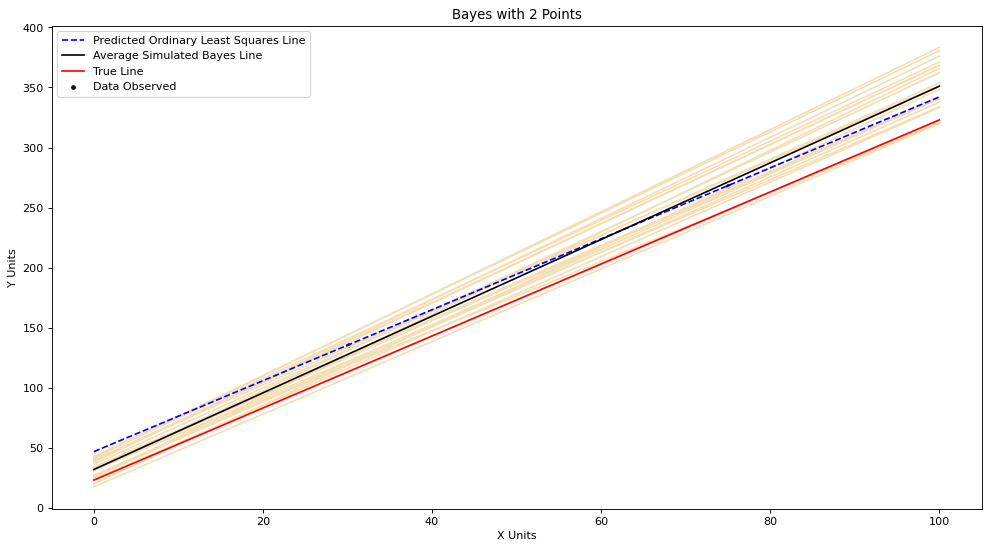

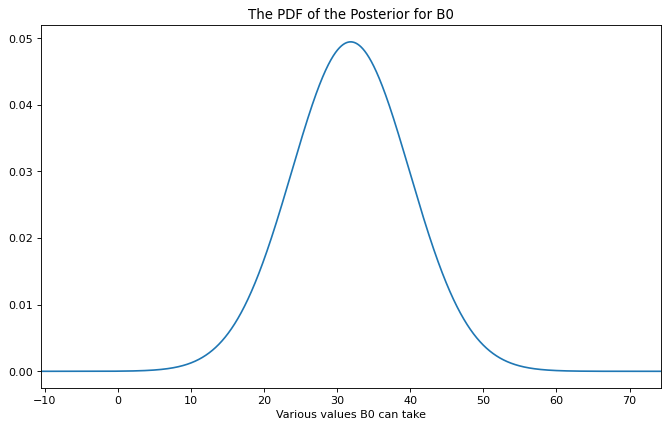

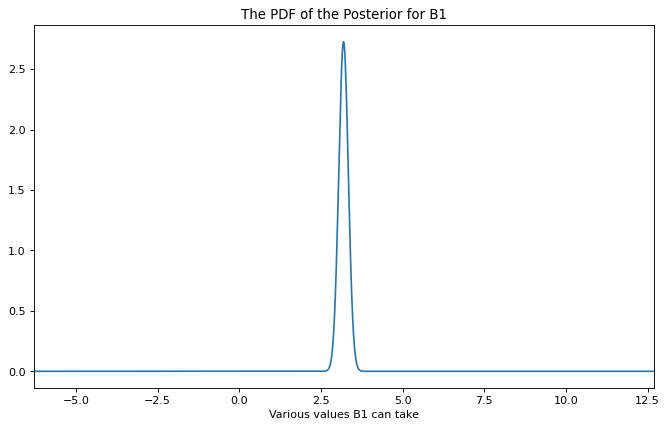

In [255]:
Bayesian_Linear_Regression(2,20)
Posteriors(2)

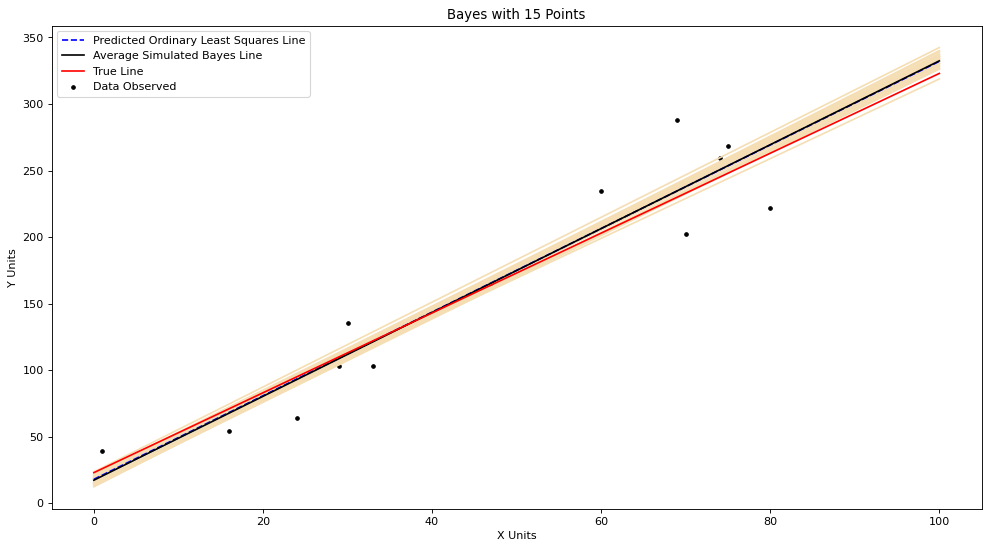

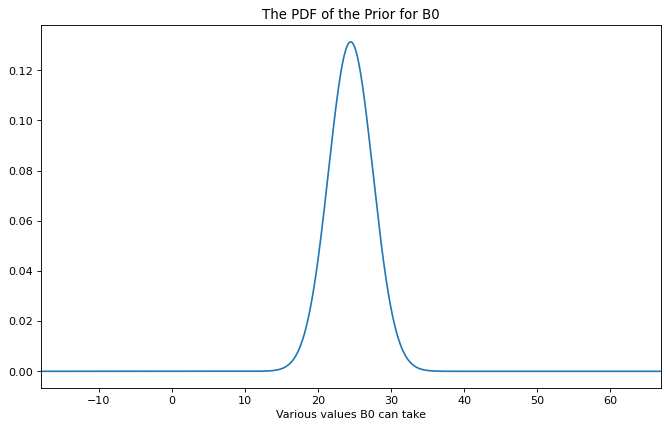

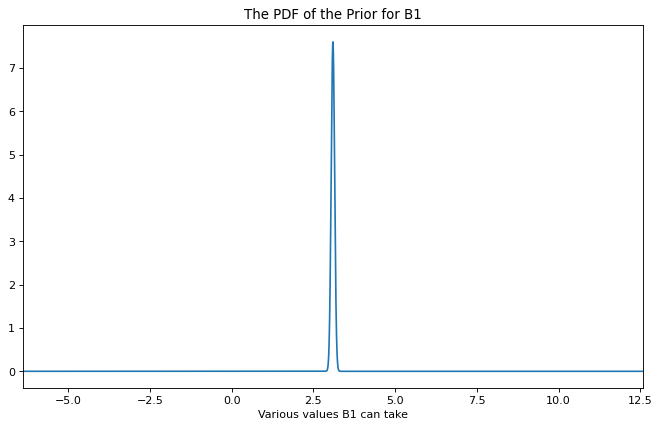

In [257]:
Bayesian_Linear_Regression(15,30)
Priors(15)

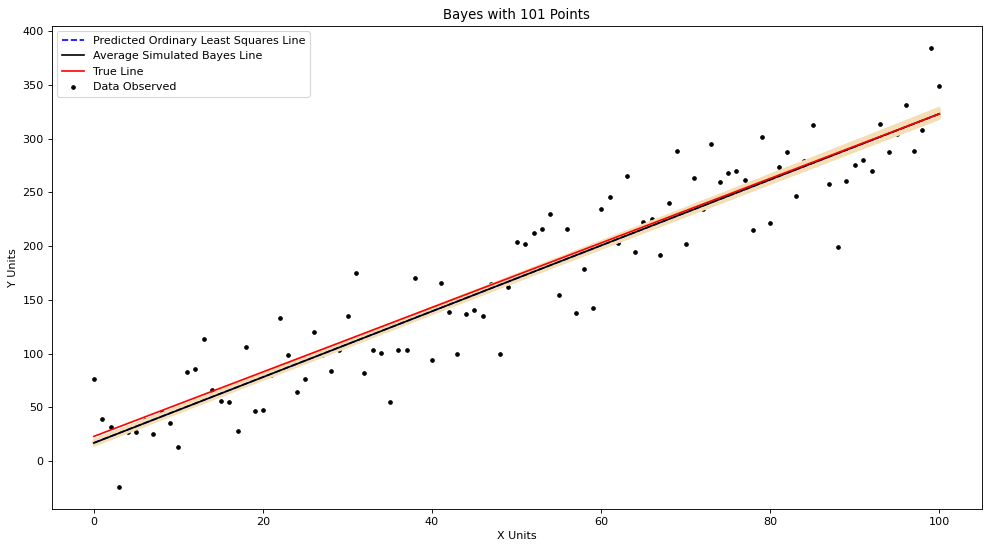

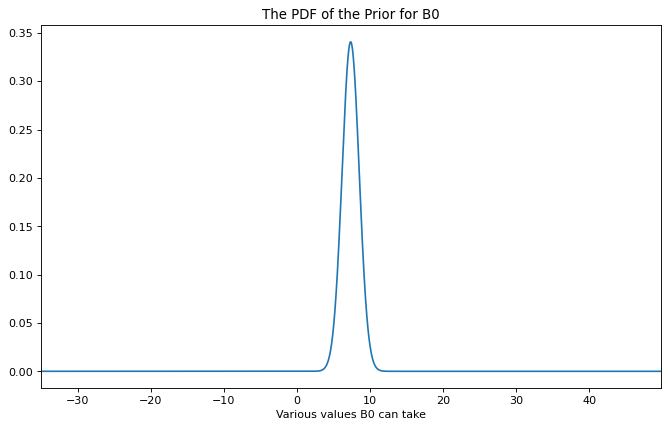

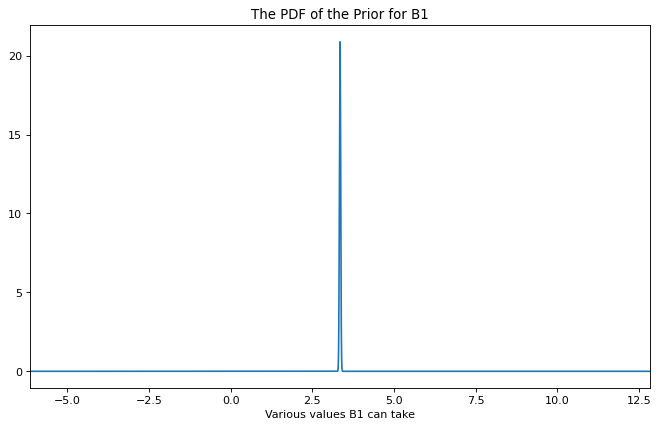

In [258]:
Bayesian_Linear_Regression(101,100)
Priors(101)

Analysis of Results:
    
    Why is the Ordinary Least Squares Line the same as the Mean of our Bayesian Linear Regression?
    
    Basically when we allow our full dataset to be used to produce the model, the Bayesian Linear Regression Mean line transposes into/replicates the standard Ordinary Least Squares line. This is because the data is now dominating the prior, which makes sense, since the posterior is defined by the (likelihood * prior distribution) so once we have many data points belonging to the likelihood function, we basically just have the likelihood function since the prior will be contributing very little. In this case, the point where the likelihood function is maximized (highest probability of occuring) is the same place that the sum of squared residuals is minimized, since the closer a data point is to the regression line, the closer it will be to the "mean" of the PDF at that point, thus higher likelihood, and at the same time the closer the data point is to the regression line the lower its squared residual will be. For this reason the two lines end up being the same.
    
    Why is the variance disappearing when more points are added?
    
    The variance of our posterior is defined as [sigma^2*(X^T*X + sigma^2*Sigma_Matrix^-1)^-1] so if we look closely at the term (X^T*X + sigma^2*Sigma_Matrix^-1)^-1 we can see that the more points we add the more X^T*X this term will grow and sigma^2*Sigma_Matrix^-1 is a constant since every term of it was defined at the start of this problem, which makes something like (large term here due to increasing data points)^-1, and the inverse of a large matrix will be a much smaller one, and since the diagonals of this resulting matrix produce the variane of B0 and B1, we can see how the more points we add to this system, the more our variance shrinks and shrinks.
    
    Why Use Bayes at all if it produces the same line as Ordinary Least Squares?
    
    The main advantage to the Bayesian approach is that it allows us to construct a confidence interval to tell us how sure we are about our prediction. This is extremely useful when the model only has a few data points to work with. However, this confidence interval is extremely dependent on the priors that we select, seeing as how if we have zero data points, the posterior is the same as our priors. So selection of priors as well as feasablity in implementation and constructing of the posterior makes the Bayesian approach take a step back in some ways when compared to the frequentist approach.